In [35]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import csv
from graph_op import KG, Query

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
G = KG()
G.remove()
with open('toy-kg copy.tsv') as f:
    rd = f.read()
f.close()
rd = rd.split('\n')
for row in rd:
    row = row.lower().rstrip('\t').split('\t')
    print(row)
    G.append_to_graph(row)

['tom hanks', 'member of political party', 'democratic party']
['tom hanks', 'occupation', 'composer']
['tom hanks', 'occupation', 'film producer']
['tom hanks', 'occupation', 'television actor']
['tom hanks', 'occupation', 'television producer']
['tom hanks', 'occupation', 'character actor']
['tom hanks', 'occupation', 'television director']
['tom hanks', 'occupation', 'screenwriter']
['tom hanks', 'occupation', 'voice actor']
['tom hanks', 'occupation', 'writer']
['tom hanks', 'occupation', 'actor']
['tom hanks', 'occupation', 'film director']
['tom hanks', 'occupation', 'film actor']
['tom hanks', 'religion', 'orthodox christianity']
['tom hanks', 'award received', 'academy award for best actor', 'point in time', '1995-01-01t00:00:00z']
['tom hanks', 'award received', 'academy award for best actor', 'statement is subject of', '67th academy awards']
['tom hanks', 'award received', 'academy award for best actor', 'for work', 'forrest gump']
['tom hanks', 'award received', 'knight of t

plotted


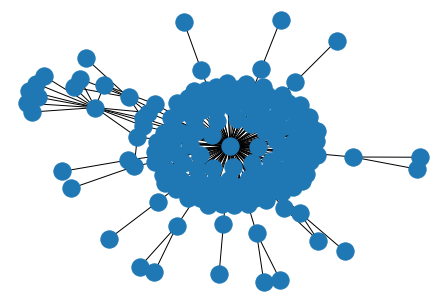

In [46]:
G.draw_graph()

In [ ]:
G.graph.nodes

In [63]:
kg_triple_list = list(G.graph.edges('tom hanks', data=True))

In [39]:
text = "What is the place of birth of Tom Hanks?"
query = Query(text.lower())
ent = query.get_entity()
for w in str(ent).split(" "):
    print(w)
    text = text.replace(w,'')
relation = " ".join(text.split(' ')[1:]).rstrip("?").rstrip(" ")
relation

tom
hanks


'is the place of birth of Tom Hanks'

In [56]:
ent
query_relation = query.get_relation(str(ent))

In [25]:
import gensim
from gensim.models import Word2Vec

In [26]:
model = gensim.models.KeyedVectors.load_word2vec_format('model.bin')

In [51]:
kg_relation = G.get_node_relation(ent)

In [87]:
one_hope_answer = G.get_similar_triple(query_relation, kg_relation)

In [91]:
G.get_object(ent, one_hope_answer)

'concord'

In [ ]:
model = gensim.models.KeyedVectors.load_word2vec_format('model.bin')

In [67]:

similarity_max = 0
triple_max = None
for triple in kg_triple_list:
    print(type(triple[2]))
    # relation = triple[2].get(data)
    # print(relation)
    break
    # relation = relation.split(" ") if ' ' in relation else list(relation)
    # similarity = model.wv.n_similarity(relation, query_relation.split(" "))
    # if similarity > similarity_max:
    #     similarity_max = similarity
    #     triple_max = triple

<class 'dict'>
